In [1]:
import tweepy

In [2]:
import re
import pickle

In [3]:
from tweepy import OAuthHandler

In [4]:
consumer_key = 'WFPrkXuQJptY82Sl0sSzdpENr'
consumer_secret = 'AX4lanuhilT5xLSX33MNVE6bGxRJioULeqfE7wzSsRLLeveIXU'
access_token = '1466040471310856193-Pp5S6MnwMaPhIc4DEBQVXhpKRlGGrI'
access_secret = 'Uix3wY78tUIrvML2NOXytqbUggCSwRLS8SPEJaOG8RHUk'

In [5]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
args = ['facebook']
api = tweepy.API(auth, timeout = 10)

In [6]:
list_tweets = []

query = args[0]

if len(args) == 1:
    for status in tweepy.Cursor(api.search_tweets, q = query+"-filter:retweets", lang = 'en', result_type = 'recent').items(1000):
        list_tweets.append(status.text)
    

In [7]:
list_tweets[7]

'@GreenJennyJones @10DowningStreet Facebook has censured my use of it because an independent fact checking body deci… https://t.co/UcYLb4Kqbs'

In [8]:
for tweet in list_tweets:
    tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$", " ", tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"that's","that is",tweet)
    tweet = re.sub(r"there's","there is",tweet)
    tweet = re.sub(r"what's","what is",tweet)
    tweet = re.sub(r"where's","where is",tweet)
    tweet = re.sub(r"it's","it is",tweet)
    tweet = re.sub(r"who's","who is",tweet)
    tweet = re.sub(r"i'm","i am",tweet)
    tweet = re.sub(r"she's","she is",tweet)
    tweet = re.sub(r"he's","he is",tweet)
    tweet = re.sub(r"they're","they are",tweet)
    tweet = re.sub(r"who're","who are",tweet)
    tweet = re.sub(r"ain't","am not",tweet)
    tweet = re.sub(r"wouldn't","would not",tweet)
    tweet = re.sub(r"shouldn't","should not",tweet)
    tweet = re.sub(r"can't","can not",tweet)
    tweet = re.sub(r"couldn't","could not",tweet)
    tweet = re.sub(r"won't","will not",tweet)
    tweet = re.sub(r'\W', ' ', tweet)
    tweet = re.sub(r'\d', ' ', tweet)
    tweet = re.sub(r'\s+[a-z]\s+', ' ', tweet)
    tweet = re.sub(r'^[a-z]\s+', ' ', tweet)
    tweet = re.sub(r'\s+[a-z]$', ' ', tweet)
    tweet = re.sub(r'\s+', ' ', tweet)
    print(tweet)

 nivagdetrolley spent from spring to harvest photographing an allotment many years back 
thanks for the recent follow https co eqeagytx love having you on twitter let connect on facebook 
 aymanmsnbc noahshachtman aymanm facebook zuckerberg wrote post on facebook which was immediately banned by 
 twitter and facebook said they have removed thousands of accounts connected to chinese information campaigns 
sarah spent time on facebook she enjoyed learning about social media post times amp follower growth she is market 
क तज ञत gratitude focus on abundance we are blessed with many positivities in life let be grateful fo 
 wonder how many accounts on linkedin reddit and facebook are covert state operated 
 greenjennyjones downingstreet facebook has censured my use of it because an independent fact checking body deci 
don update pokemonbrilliantdiamond pokemonshiningpearl it removes the duplicate glitch 
therapist bianca mccall speaks on grief and getting through the holidays without loved 

In [9]:
from nltk.corpus import stopwords
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer

vector = CountVectorizer(max_features = 2000, stop_words = stopwords.words('english'))
tweet = vector.fit_transform(list_tweets).toarray()

In [10]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()

tweet = transformer.fit_transform(tweet).toarray()

In [11]:
from nltk.corpus import stopwords
from sklearn.datasets import load_files


reviews = load_files('txt_sentoken/')

In [12]:
x, y = reviews.data, reviews.target

In [13]:
corpus = []

for i in range(len(x)):
    
    review = re.sub(r'\W', ' ', str(x[i]))
    review = review.lower()
    review = re.sub(r'\s+[a-z]\s+', ' ', review)
    review = re.sub(r'^[a-z]\s', ' ', review)
    review = re.sub(r'\s+', ' ', review)
    corpus.append(review)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

vector = CountVectorizer(max_features = len(corpus), min_df = 3, max_df = 0.6, stop_words = stopwords.words('english'))

In [15]:
x = vector.fit_transform(corpus).toarray()

In [16]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()

x = transformer.fit_transform(x).toarray()

In [17]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [18]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(xtrain, ytrain)

LogisticRegression()

In [19]:
sentiment = classifier.predict(tweet)

In [20]:
total_pos = 0
total_neg = 0


for i in range(len(list_tweets)):
    if sentiment[i] == 1:
        total_pos = total_pos + 1
    else:
        total_neg = total_neg + 1
    print(list_tweets[i], ' : ', sentiment[i])

@Nivagdetrolley https://t.co/55Z2HnGiZJ
I spent from spring to harvest photographing an allotment many years back.… https://t.co/jvJYXYNCwf  :  1
Thanks for the recent follow, https://t.co/x8eQEagytx. Love having you on Twitter! Let's connect on Facebook… https://t.co/hAOKzbyY3M  :  1
@AymanMSNBC @NoahShachtman @AymanM #Facebook #Zuckerberg I wrote a post on Facebook which was immediately banned by… https://t.co/641p4SwKf9  :  0
"Twitter and Facebook said they have removed thousands of accounts connected to Chinese information campaigns". 

H… https://t.co/rYiGlwC4km  :  1
Sarah spent time on Facebook. She enjoyed learning about social media post times &amp; follower growth. She is a market… https://t.co/F3CikVYjwY  :  0
कृतज्ञता - Gratitude 🙏🏻
Focus on Abundance !

We are blessed with many positivities in life !
Let’s be #Grateful fo… https://t.co/zXEOl9AEPc  :  1
I wonder how many accounts on @LinkedIn, @Reddit and @Facebook are covert state-operated.  :  1
@GreenJennyJones @10Downin

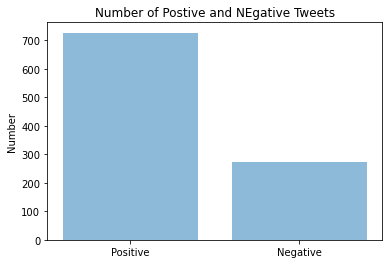

In [21]:
import matplotlib.pyplot as plt
import numpy as np
objects = ['Positive','Negative']
y_pos = np.arange(len(objects))

plt.bar(y_pos,[total_pos,total_neg],alpha=0.5)
plt.xticks(y_pos,objects)
plt.ylabel('Number')
plt.title('Number of Postive and NEgative Tweets')

plt.show()